In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# df = pd.read_csv('ditaAI_dataTraining.csv')
df = pd.read_excel('RAW/DitaAja_Trained_Data.xlsx', 'Train')

In [5]:
df

,tagging,training_data
0,"wifi, visa",Bagaimana cara connect wifi dan visa
1,wifi,wifi
2,wifi,laptop wifi
3,wifi,wifi connect
4,visa,saya ingin konek ke visa tapi tidak bisa
...,...,...
641,"kurang jelas, mic",suara dari teams kurang jelas
642,"kurang jelas, mic",microsoft teams suara putus putus
643,"kurang jelas, mic",bagaimana cara mengatasi suara putus putus pad...
644,"kurang jelas, mic",suara kurang jelas saat menggunakan teams


In [6]:
df['training_data'] = df['training_data'].apply(lambda x: x.lower())
df['tagging'] = df['tagging'].apply(lambda x: x.lower())
tagging = df['tagging'].str.cat(sep = ', ')

In [7]:
tagging = list(set(tagging.split(', ')))

In [8]:
t = pd.DataFrame(tagging, columns=['Tags'])
t['Tags'] = t['Tags'].apply(lambda x: x.strip())
t.sort_values(by=['Tags'], inplace=True)
t.to_csv('datasets/all_labels.csv', index=False)

In [9]:
tagging = t['Tags'].tolist()

In [10]:
c1 = ['questions', 'tagging']
c1.extend(tagging)
t1 = pd.DataFrame(columns=c1)
t1['questions'] = df['training_data']
t1['tagging'] = df['tagging']
t1.fillna(0, inplace=True)

In [11]:
def changeLabelValue(x):
    tags = x['tagging'].split(', ')
    if len(tags) > 1:
        for tag in tags:
            if tag.strip() in x:
                x[tag.strip()] = 1
    else:
        if x['tagging'] in x:
            x[x['tagging']] = 1
    return x

In [12]:
new_row = []
def splitNewRow(x):
    columns = x.keys()[1:]
    faqs = x['questions'].split(',')
    if len(faqs) > 1:
        for index, faq in enumerate(faqs):
            if index == 0:
                x['questions'] = faq
                continue
            data = [faq]
            data.extend(x[columns])
            new_row.append(data)
    return x

In [13]:
t1 = t1.apply(changeLabelValue, axis=1)

In [14]:
t1 = t1.drop(['tagging'], axis=1)

In [15]:
t1

,questions,aja,akses visa,an,aplikasi,backup,buat,by,byod,cara connect,...,update,user,user domain,verify,virus,visa,vpn,waktu dsc,web,wifi
0,bagaimana cara connect wifi dan visa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,wifi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,laptop wifi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,wifi connect,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,saya ingin konek ke visa tapi tidak bisa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,suara dari teams kurang jelas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642,microsoft teams suara putus putus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643,bagaimana cara mengatasi suara putus putus pad...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
644,suara kurang jelas saat menggunakan teams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
t1 = t1.apply(splitNewRow, axis=1)

In [17]:
t2 = pd.DataFrame(new_row, columns=t1.columns)

In [18]:
t1 = t1.append(t2)

/tmp/ipykernel_78039/3994074905.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t1 = t1.append(t2)


In [19]:
# t1.to_csv('new_dataset.csv', index=False)
t1

,questions,aja,akses visa,an,aplikasi,backup,buat,by,byod,cara connect,...,update,user,user domain,verify,virus,visa,vpn,waktu dsc,web,wifi
0,bagaimana cara connect wifi dan visa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,wifi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,laptop wifi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,wifi connect,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,saya ingin konek ke visa tapi tidak bisa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,suara dari teams kurang jelas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642,microsoft teams suara putus putus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643,bagaimana cara mengatasi suara putus putus pad...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
644,suara kurang jelas saat menggunakan teams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = t1.columns[1:]
bar_plot['count'] = t1.iloc[:,1:].sum().values

In [21]:
threshold = 10

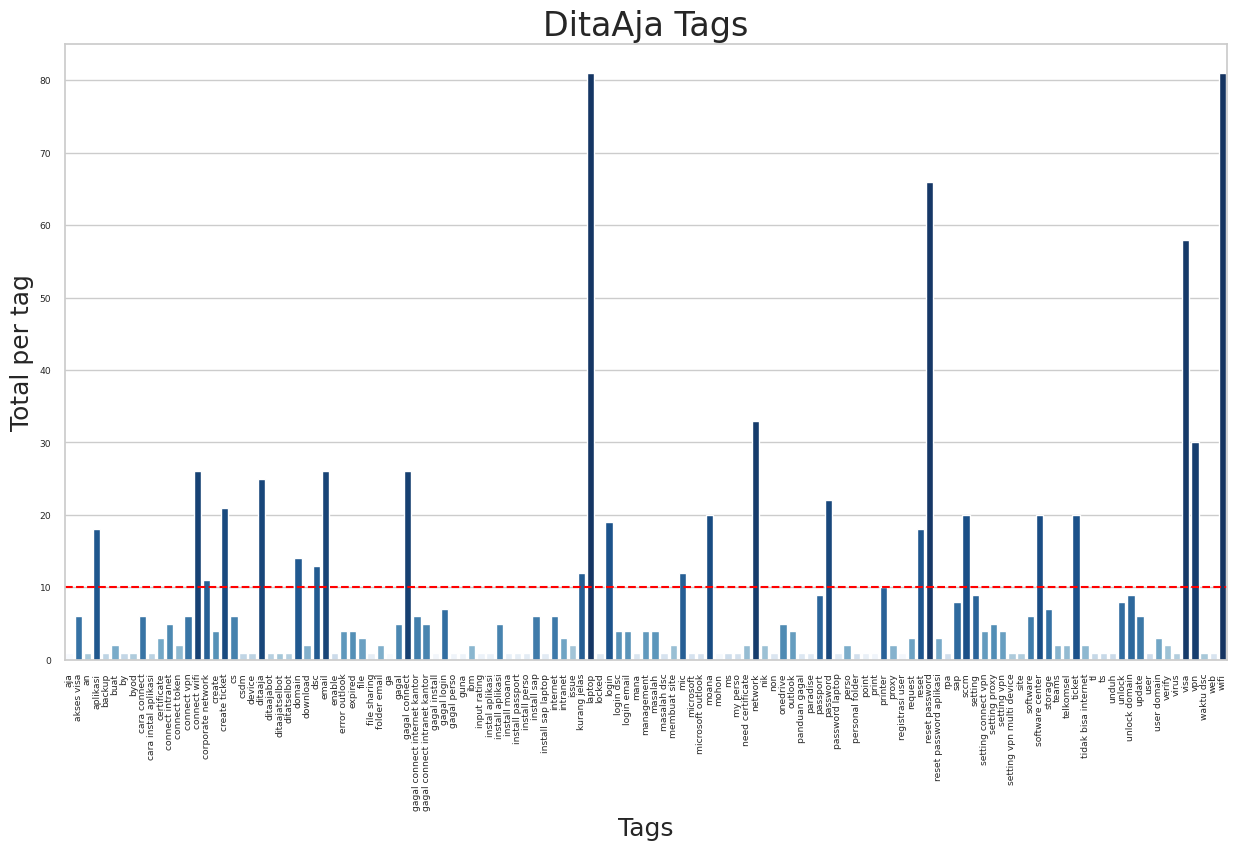

In [22]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 0.6)
sns.set_style('whitegrid') 

pal = sns.color_palette("Blues_r", len(bar_plot))
rank = bar_plot['count'].argsort().argsort()  
sns.barplot(x=bar_plot['cat'], y=bar_plot['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("DitaAja Tags", fontsize=24)
plt.ylabel('Total per tag', fontsize=18)
plt.xlabel('Tags', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [23]:
columns = t1.columns[1:]
selected_data = bar_plot[bar_plot['count'] >= threshold]
categories = selected_data['cat'].values

drop_tag = []
for i in t1.columns[1:]:
    if i not in categories:
        drop_tag.append(i)

t1 = t1.drop(drop_tag, axis=1)

In [24]:
t1 = t1.loc[(t1[t1.columns[1:]].T != 0).any()]

In [25]:
import csv
t1.to_csv('datasets/new_dataset.csv', index=False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)

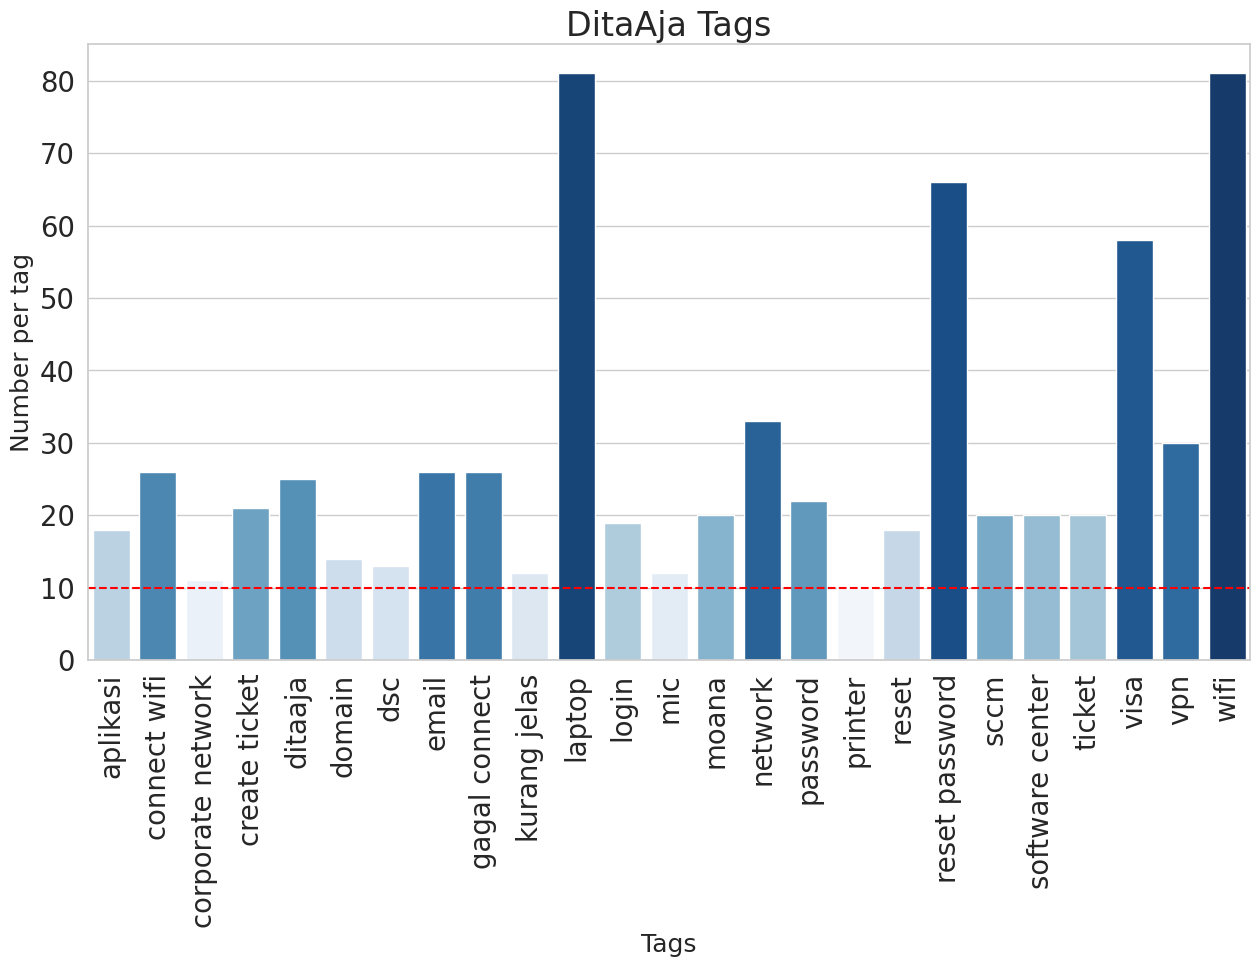

In [26]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = t1.columns[1:]
selected_columns = t1.columns[1:]
bar_plot['count'] = t1.iloc[:,1:].sum().values

plt.figure(figsize=(15,8))
sns.set(font_scale = 1.8)
sns.set_style('whitegrid') 

pal = sns.color_palette("Blues_r", len(bar_plot))
rank = bar_plot['count'].argsort().argsort()  
sns.barplot(x=bar_plot['cat'], y=bar_plot['count'], palette=np.array(pal[::-1])[rank])
plt.axhline(threshold, ls='--', c='red')
plt.title("DitaAja Tags", fontsize=24)
plt.ylabel('Number per tag', fontsize=18)
plt.xlabel('Tags', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [27]:
df2 = pd.read_excel('RAW/DitaAja_Trained_Data.xlsx', "Test")

ValueError: Worksheet named 'Test' not found

In [ ]:
df2['training_data'] = df2['training_data'].apply(lambda x: x.lower())
df2['tagging'] = df2['tagging'].apply(lambda x: x.lower())

In [ ]:
selected_columns

Index(['aplikasi', 'connect wifi', 'corporate network', 'create ticket',
       'ditaaja', 'domain', 'dsc', 'email', 'gagal connect', 'laptop', 'login',
       'moana', 'network', 'password', 'printer', 'reset', 'reset password',
       'sccm', 'software center', 'ticket', 'visa', 'vpn', 'wifi'],
      dtype='object')

In [ ]:
c1 = ['questions', 'tagging']
c1.extend(selected_columns)
t1 = pd.DataFrame(columns=c1)
t1['questions'] = df2['training_data']
t1['tagging'] = df2['tagging']
t1.fillna(0, inplace=True)
new_row = []

In [ ]:
t1 = t1.apply(changeLabelValue, axis=1)
t1

,aplikasi,connect wifi,corporate network,create ticket,ditaaja,domain,dsc,email,gagal connect,install sap,...,reset,reset password,sccm,software center,tagging,ticket,unlock domain,visa,vpn,wifi
0,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,visa,0,NaN,1,0,0
1,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,wifi,0,NaN,0,0,1
2,0,0,0,0,0,0,0,1,0,NaN,...,0,0,0,0,email,0,NaN,0,0,0
3,0,0,0,0,0,0,0,0,1,NaN,...,0,0,0,0,"gagal connect, vpn",0,NaN,0,1,0
4,0,0,0,0,0,0,0,0,0,NaN,...,0,1,0,0,reset password,0,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,NaN,...,0,1,0,0,reset password,0,NaN,0,0,0
86,0,0,0,0,0,1,0,0,0,NaN,...,0,0,0,0,"unlock domain, domain",0,1.0,0,0,0
87,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,ticket,1,NaN,0,0,0
88,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,ticket,1,NaN,0,0,0


In [ ]:
t1 = t1.drop(['tagging'], axis=1)
t1

,aplikasi,connect wifi,corporate network,create ticket,ditaaja,domain,dsc,email,gagal connect,install sap,...,questions,reset,reset password,sccm,software center,ticket,unlock domain,visa,vpn,wifi
0,0,0,0,0,0,0,0,0,0,NaN,...,cara connect ke visa,0,0,0,0,0,NaN,1,0,0
1,0,0,0,0,0,0,0,0,0,NaN,...,cara connect ke wifi,0,0,0,0,0,NaN,0,0,1
2,0,0,0,0,0,0,0,1,0,NaN,...,cara setting email,0,0,0,0,0,NaN,0,0,0
3,0,0,0,0,0,0,0,0,1,NaN,...,gagal connect ke vpn,0,0,0,0,0,NaN,0,1,0
4,0,0,0,0,0,0,0,0,0,NaN,...,cara reset password domain,0,1,0,0,0,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,NaN,...,cara atasi password expired,0,1,0,0,0,NaN,0,0,0
86,0,0,0,0,0,1,0,0,0,NaN,...,domain saya minta di unlock,0,0,0,0,0,1.0,0,0,0
87,0,0,0,0,0,0,0,0,0,NaN,...,cara cek status ticket,0,0,0,0,1,NaN,0,0,0
88,0,0,0,0,0,0,0,0,0,NaN,...,bagaimana cara check status ticket,0,0,0,0,1,NaN,0,0,0


In [ ]:
t1 = t1.apply(splitNewRow, axis=1)

In [ ]:
t2 = pd.DataFrame(new_row, columns=t1.columns)
t1 = t1.append(t2)

In [ ]:
bar_plot = pd.DataFrame()
bar_plot['cat'] = t1.columns[1:]
bar_plot['count'] = t1.iloc[:,1:].sum().values

In [ ]:
t1 = t1.loc[(t1[t1.columns[1:]].T != 0).any()]

In [ ]:
import csv
t1.to_csv('datasets/data_test.csv', index=False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)